# Import libraries & data

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pip install squarify
import squarify

In [4]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Trâm_Python_Final_Project/ecommerce retail.xlsx'

ecommerce_retail = pd.read_excel(file_path, sheet_name='ecommerce retail')
segmentation = pd.read_excel(file_path, sheet_name='Segmentation')

Mounted at /content/drive


In [5]:
ecommerce_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [6]:
segmentation

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


#EDA
###There are 135,080 missing data in the `CustomerID` and 1,454 in the `Description`=> action: Remove rows with missing data in the `CustomerID` as it is the primary key for customer groups, and keep the data in the `Description` unchanged.
###Data type is normal.
###There are 5,225 duplicate rows => action: no action needed.
###Keep only positive values in the `UnitPrice` and `Quantity` columns.

In [7]:
ecommerce_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
ecommerce_retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [9]:
#Missing data
print(ecommerce_retail.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [10]:
#Remove missing data in the CustomerID column
ecommerce_retail = ecommerce_retail.dropna(subset=['CustomerID'])

In [11]:
#Duplicates data
ecommerce_retail.duplicated().sum()

5225

In [12]:
#Keep only positive values in the UnitPrice and Quantity columns
ecommerce_retail = ecommerce_retail[(ecommerce_retail['Quantity'] > 0) & (ecommerce_retail['UnitPrice'] > 0)]

#RFM Score

In [13]:
reference_date = pd.to_datetime('2011-12-31')

#Calculate the RFM score for each customer
RFM_Score = ecommerce_retail.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (reference_date - x.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('Quantity', lambda x: (x * ecommerce_retail.loc[x.index, 'UnitPrice']).sum())
).reset_index()

RFM_Score.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [14]:
RFM_Score['CustomerID'] = RFM_Score['CustomerID'].astype(int)
RFM_Score

,CustomerID,Recency,Frequency,Monetary
0,12346,346,1,77183.60
1,12347,23,7,4310.00
2,12348,96,4,1797.24
3,12349,39,1,1757.55
4,12350,331,1,334.40
...,...,...,...,...
4333,18280,298,1,180.60
4334,18281,201,1,80.82
4335,18282,28,2,178.05
4336,18283,24,16,2094.88


In [15]:
#Create RFM_Score on scale from 1 to 5
RFM_Score['recency_rank'] = RFM_Score['Recency'].rank(method='first')
RFM_Score['frequency_rank'] = RFM_Score['Frequency'].rank(method='first')
RFM_Score['monetary_rank'] = RFM_Score['Monetary'].rank(method='first')


RFM_Score['R_Score'] = pd.qcut(RFM_Score['recency_rank'], 5, labels=[5, 4, 3, 2, 1])
RFM_Score['F_Score'] = pd.qcut(RFM_Score['frequency_rank'], 5, labels=[1, 2, 3, 4, 5])
RFM_Score['M_Score'] = pd.qcut(RFM_Score['monetary_rank'], 5, labels=[1, 2, 3, 4, 5])

RFM_Score['RFM_Score'] = RFM_Score['R_Score'].astype(str) + RFM_Score['F_Score'].astype(str) + RFM_Score['M_Score'].astype(str)

RFM_Score = RFM_Score[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score']]

In [16]:
RFM_Score

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346,346,1,77183.60,1,1,5,115
1,12347,23,7,4310.00,5,5,5,555
2,12348,96,4,1797.24,2,4,4,244
3,12349,39,1,1757.55,4,1,4,414
4,12350,331,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...
4333,18280,298,1,180.60,1,2,1,121
4334,18281,201,1,80.82,1,2,1,121
4335,18282,28,2,178.05,5,3,1,531
4336,18283,24,16,2094.88,5,5,5,555


#RFM Score with Segmentation

In [17]:
#Transform, split the Segmentation table
segmentation.columns = segmentation.columns.str.replace(' ', '_')
segmentation['RFM_Score'] = segmentation['RFM_Score'].str.split(',')
segmentation = segmentation.explode('RFM_Score').reset_index(drop=True)

In [18]:
#Combining RFM_Score with customer segmentation
segmentation['RFM_Score'] = segmentation['RFM_Score'].astype(int)
RFM_Score['RFM_Score'] = RFM_Score['RFM_Score'].astype(int)

RFM_Segmentation = RFM_Score.merge(segmentation, on='RFM_Score', how='left')

<ipython-input-18-cbcd9ce2a5fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_Score['RFM_Score'] = RFM_Score['RFM_Score'].astype(int)


In [19]:
RFM_Segmentation

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346,346,1,77183.60,1,1,5,115,Cannot Lose Them
1,12347,23,7,4310.00,5,5,5,555,Champions
2,12348,96,4,1797.24,2,4,4,244,At Risk
3,12349,39,1,1757.55,4,1,4,414,Promising
4,12350,331,1,334.40,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...
4333,18280,298,1,180.60,1,2,1,121,Lost customers
4334,18281,201,1,80.82,1,2,1,121,Lost customers
4335,18282,28,2,178.05,5,3,1,531,Potential Loyalist
4336,18283,24,16,2094.88,5,5,5,555,Champions


#Visualization

##Histogram

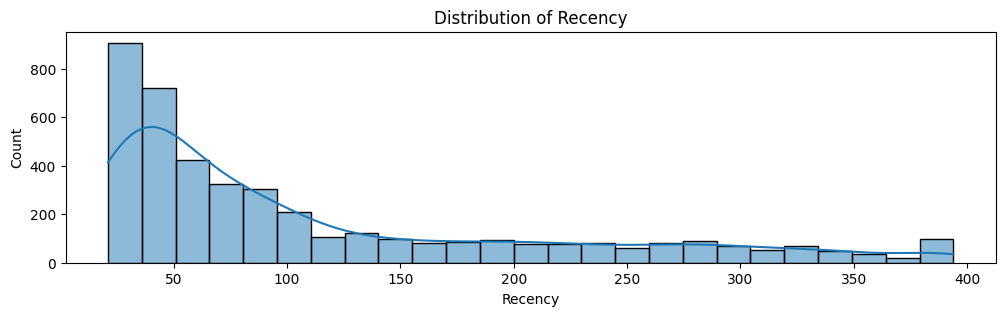

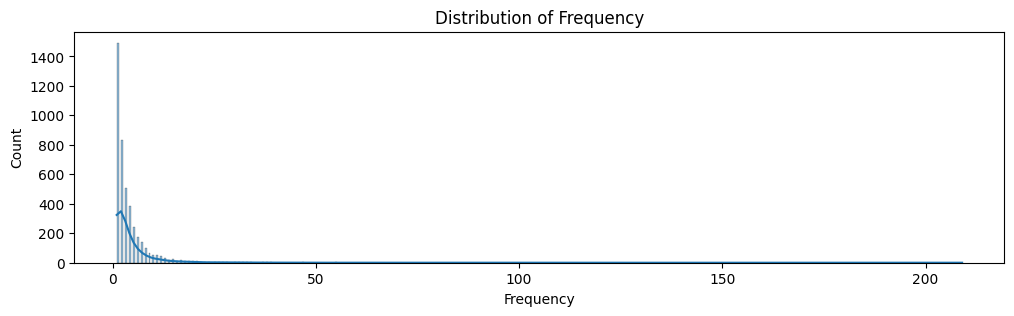

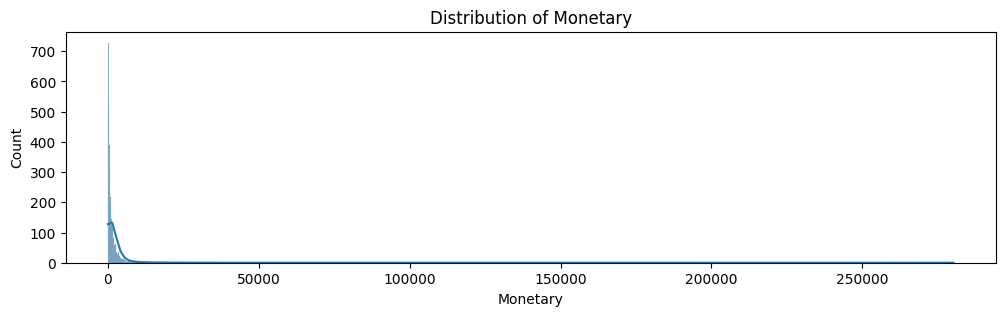

In [20]:
colnames = ['Recency', 'Frequency', 'Monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12, 3))
    sns.histplot(RFM_Score[col], kde=True, ax=ax)
    ax.set_title('Distribution of %s' % col)
    plt.show()

##Treemap

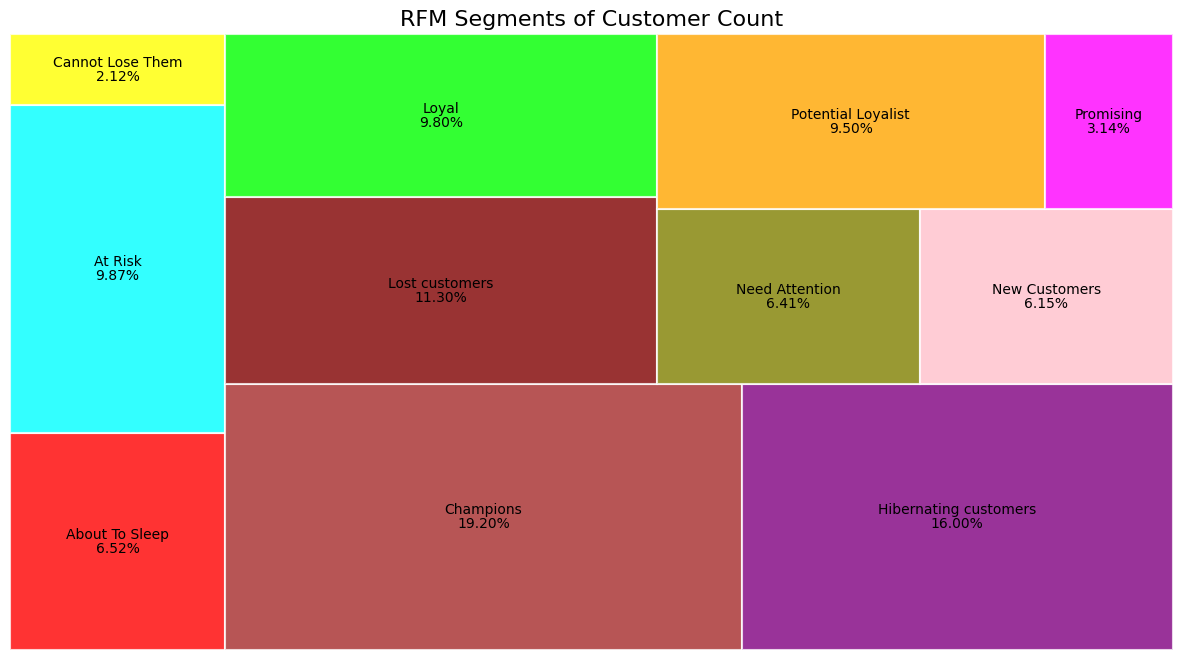

In [21]:
#Segment by Customers

grp = RFM_Segmentation.groupby('Segment').agg({'CustomerID': 'count'}).reset_index()

colors = ['#FF0000', '#00FFFF', '#FFFF00', '#A52A2A', '#800080', '#800000', '#00FF00', '#808000', '#FFC0CB', '#FFA500', '#FF00FF']

fig, ax = plt.subplots(1, figsize=(15, 8))

squarify.plot(sizes=grp['CustomerID'],
              label=grp['Segment'],
              value=[f'{x*100/len(RFM_Segmentation):.2f}%' for x in grp['CustomerID']],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white"))

plt.title('RFM Segments of Customer Count', fontsize=16)
plt.axis('off')
plt.show()

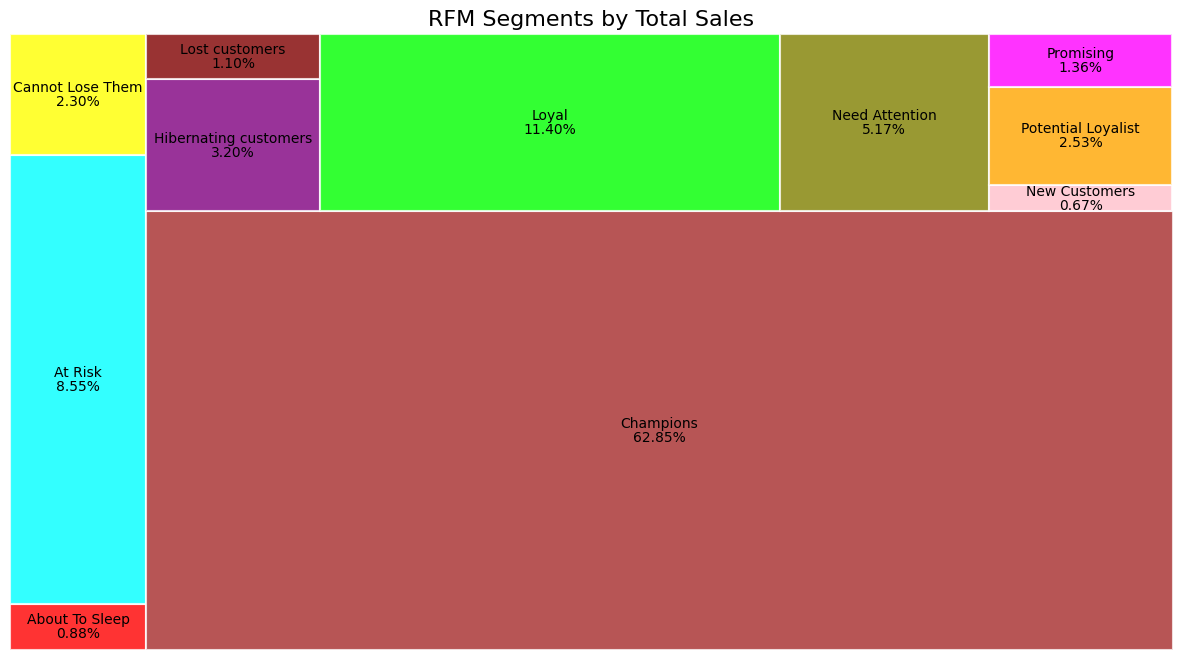

In [22]:
#Segment by Total sales

grp_sales = RFM_Segmentation.groupby('Segment').agg({'Monetary': 'sum'}).reset_index()

colors = ['#FF0000', '#00FFFF', '#FFFF00', '#A52A2A', '#800080', '#800000', '#00FF00', '#808000', '#FFC0CB', '#FFA500', '#FF00FF']

fig, ax = plt.subplots(1, figsize=(15, 8))

squarify.plot(sizes=grp_sales['Monetary'],
              label=grp_sales['Segment'],
              value=[f'{x*100/grp_sales["Monetary"].sum():.2f}%' for x in grp_sales['Monetary']],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white"))

plt.title('RFM Segments by Total Sales', fontsize=16)
plt.axis('off')
plt.show()

##Bar plot

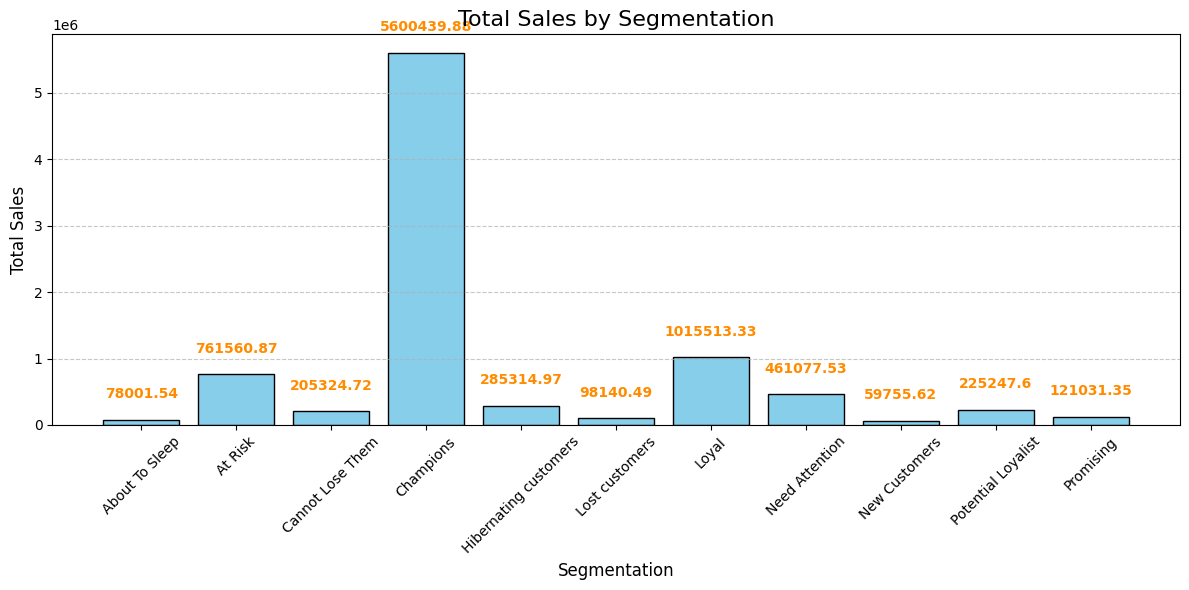

In [25]:
#Total Sales by Segmentation

sales_seg = RFM_Segmentation.groupby("Segment").agg(total_sales=("Monetary", "sum")).reset_index()
plt.figure(figsize=(12, 6))
plt.bar(sales_seg["Segment"], sales_seg["total_sales"], color='skyblue', edgecolor='black')

for i, v in enumerate(round(sales_seg["total_sales"], 2)):
    plt.text(i, v + 0.05 * max(sales_seg["total_sales"]), str(v), color='darkorange', fontweight='bold', ha='center', va='bottom')

plt.title('Total Sales by Segmentation', fontsize=16)
plt.xlabel('Segmentation', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()